In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [2]:
dataset=pd.read_csv("appdata10.csv")

In [3]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
dataset["hour"]=dataset.hour.str.slice(1,3).astype(long)

In [6]:
dataset2=dataset.copy().drop(columns=["user","screen_list","enrolled_date","first_open","enrolled"])

In [7]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


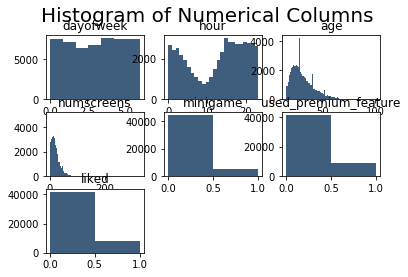

In [8]:
#Correalation with response
plt.suptitle("Histogram of Numerical Columns",fontsize=20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    
    vals=np.size(dataset2.iloc[:,i-1].unique())
    
    plt.hist(dataset2.iloc[:,i-1],bins=vals,color="#3F5D7D")
    

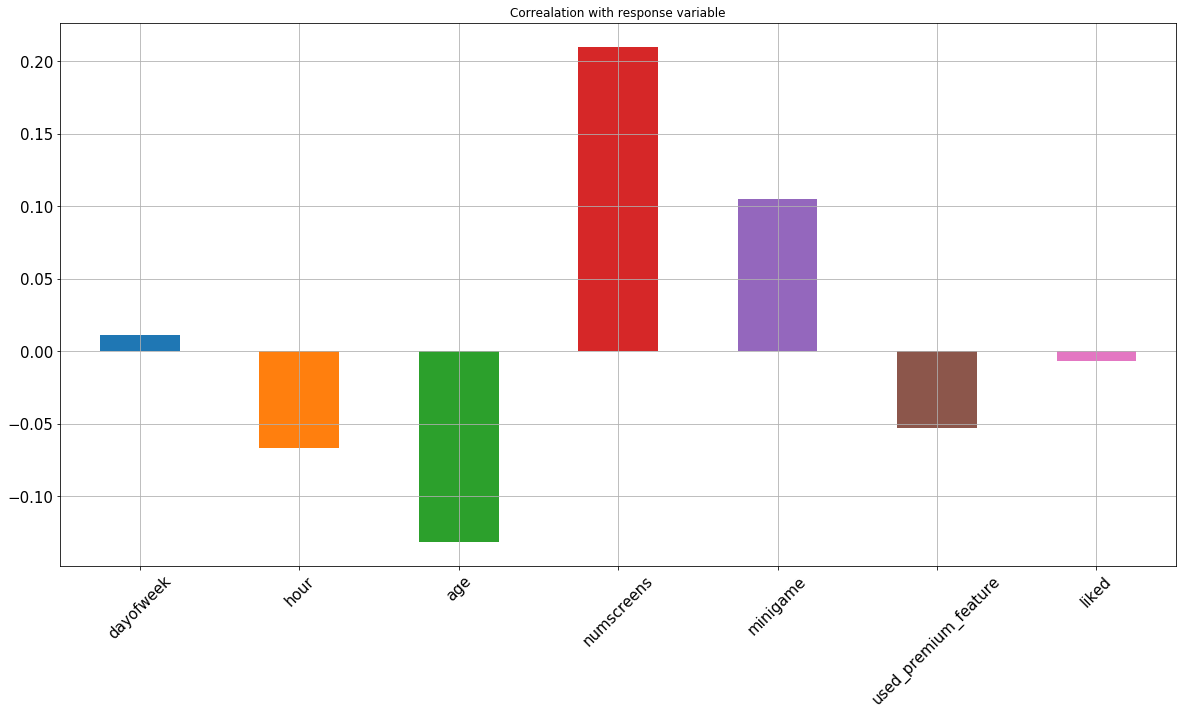

In [9]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),
                                           title="Correalation with response variable",
                                           fontsize=15,rot=45,grid=True)

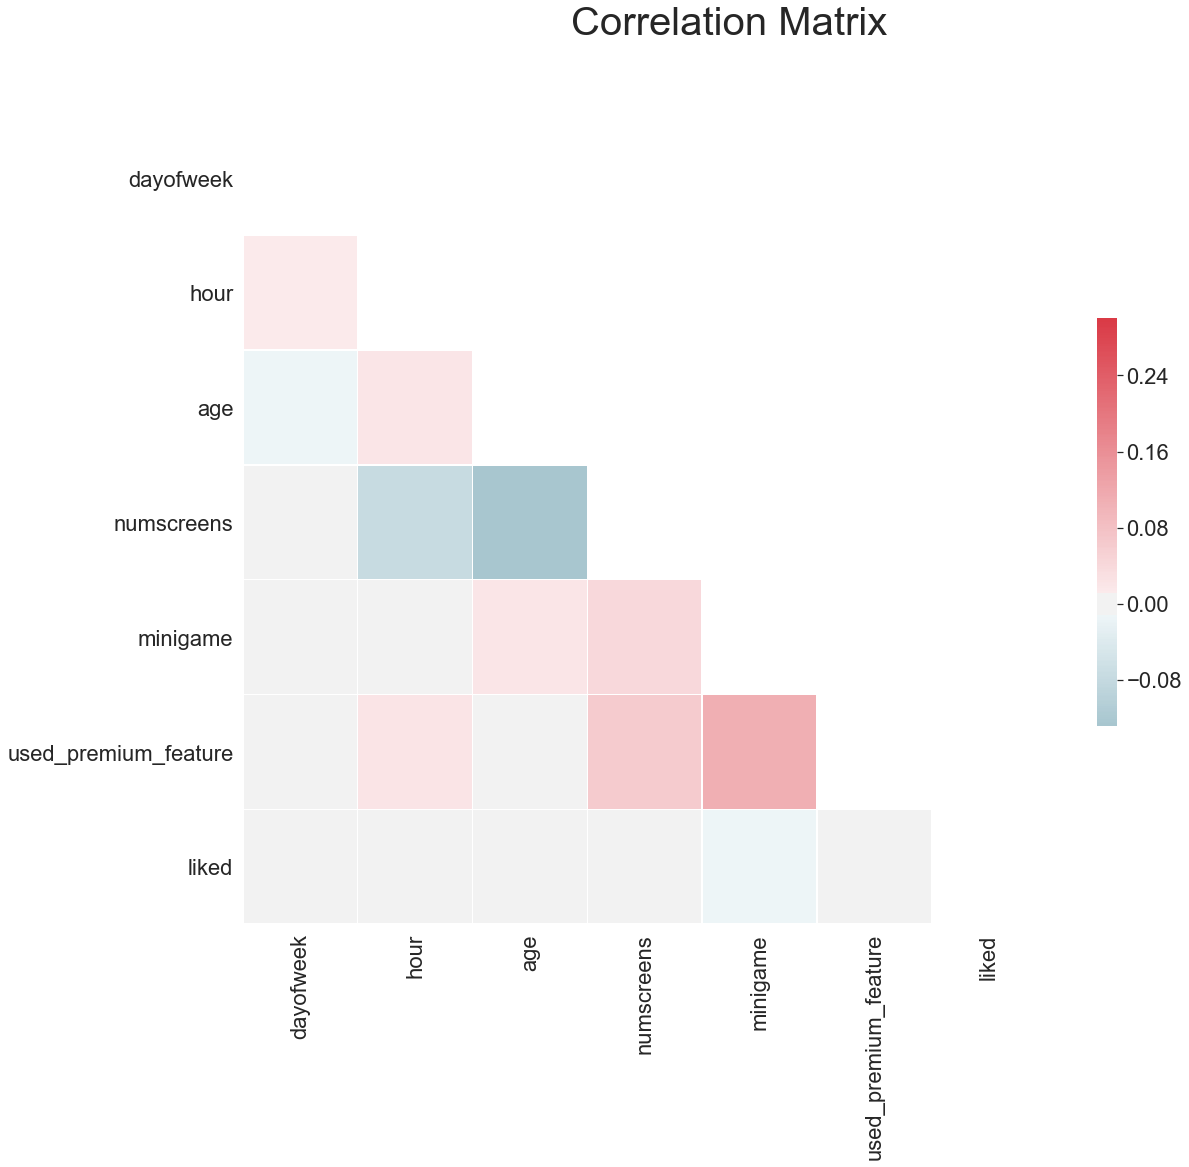

In [10]:
#correaltion matrix
sns.set(style="white",font_scale=2)

#Compute the correlation matrix
corr=dataset2.corr()

#Generate a upper mask for upper triangle
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

#Set up the matplotlib figure
f, ax=plt.subplots(figsize=(18,15))
f.suptitle("Correlation Matrix",fontsize=40)

#Generate a diverging colormap
cmap=sns.diverging_palette(220,10,as_cmap=True)

#Draw the heatmap with mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5})


In [11]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [12]:
dataset["first_open"]=[parser.parse(row_data) for row_data in dataset["first_open"]]
dataset["enrolled_date"]=[parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset["enrolled_date"]]

Text(0.5, 1.0, 'Distribution of Time-Since-Enrolled')

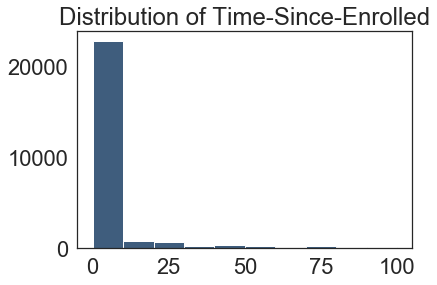

In [13]:
dataset["difference"]=(dataset.enrolled_date-dataset.first_open).astype("timedelta64[h]")
plt.hist(dataset["difference"].dropna(),color='#3F5D7D',range=[0,100])
plt.title("Distribution of Time-Since-Enrolled")

In [14]:
dataset.loc[dataset.difference > 48 ,"enrolled"]=0
dataset=dataset.drop(columns=["difference","enrolled_date","first_open"])

In [15]:
top_screens=pd.read_csv("top_screens.csv").top_screens.values

In [16]:
#Formatting the screen list field
dataset["screen_list"]=dataset.screen_list.astype(str)+","

In [17]:
for sc in top_screens:
    dataset[sc]=dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"]=dataset.screen_list.str.replace(sc+",","")

In [18]:
dataset["Other"]=dataset.screen_list.str.count(",")
dataset=dataset.drop(columns=["screen_list"])

In [19]:
#Funnels
saving_screens=["Saving1","Saving2","Saving2Amount","Saving4","Saving5","Saving6","Saving7","Saving8","Saving9","Saving10"]
dataset["SavingsCount"]=dataset[saving_screens].sum(axis=1)
dataset=dataset.drop(columns=saving_screens)

In [20]:
cm_screens=["Credit1","Credit2","Credit3","Credit3Container","Credit3Dashboard"]
dataset["CMCount"]=dataset[cm_screens].sum(axis=1)
dataset=dataset.drop(columns=cm_screens)

In [21]:
cc_screens=["CC1","CC1Category","CC3"]
dataset["CCCount"]=dataset[cc_screens].sum(axis=1)
dataset=dataset.drop(columns=cc_screens)

In [22]:
loan_screens=["Loan","Loan2","Loan3","Loan4"]
dataset["LoansCount"]=dataset[loan_screens].sum(axis=1)
dataset=dataset.drop(columns=loan_screens)

In [23]:
dataset.to_csv("new_appdata10.csv",index=False)

In [24]:
dataset_new=pd.read_csv("new_appdata10.csv")

In [25]:
#Data PreProcessing
response=dataset_new["enrolled"]
dataset=dataset_new.drop(columns="enrolled")

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset_new,response,test_size=0.2,random_state=0)

In [27]:
train_identifier=x_train["user"]
x_train=x_train.drop(columns="user")
test_identifier=x_test["user"]
x_test=x_test.drop(columns="user")

In [28]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train2=pd.DataFrame(sc_x.fit_transform(x_train))
x_test2=pd.DataFrame(sc_x.transform(x_test))
x_train2.columns=x_train.columns.values
x_test2.columns=x_test.columns.values
x_train2.index=x_train.index.values
x_test2.index=x_test.index.values
x_train=x_train2
x_test=x_test2 

C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [29]:
#Model Building
from sklearn.linear_model import LogisticRegression

In [30]:
clf=LogisticRegression(random_state=0,penalty="l1")
clf.fit(x_train,y_train)

C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_pred=clf.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [33]:
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)
precision_score(y_test,y_pred)
recall_score(y_test,y_pred)
f1_score(y_test,y_pred)

1.0

Test Data Accuracy:


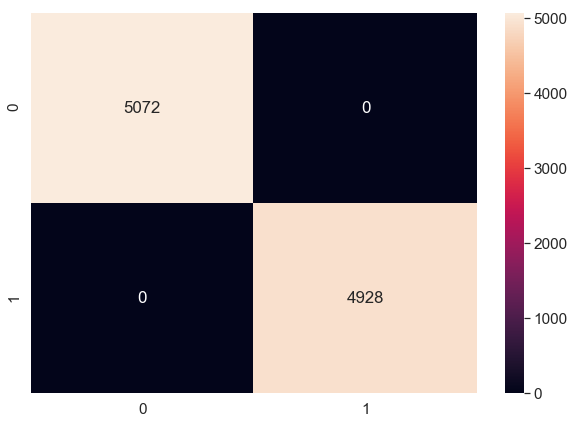

In [34]:
df_cm=pd.DataFrame(cm,index=(0,1),columns=(0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,fmt="g")
print("Test Data Accuracy:"%accuracy_score(y_test,y_pred))

In [38]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=clf, X=x_train, y=y_train,cv=10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)"%(accuracies.mean(),accuracies.std()*2))

C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

Logistic Accuracy: 1.000 (+/- 0.000)


In [40]:
#Formatting the final results
final_results=pd.concat([y_test,test_identifier],axis=1).dropna()
final_results["predicted_results"]=y_pred
final_results=final_results[["user","enrolled","predicted_results"]].reset_index(drop=True)

In [41]:
final_results

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,1
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0
